In [1]:
# https://henryhammond.ghost.io/bayesian-t-test/

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from IPython.core.pylabtools import figsize
from scipy.stats import gaussian_kde

In [2]:
# generate data (ground truth)
group1 = np.random.normal(15, 2, 1000)
group2 = np.random.normal(15.7, 2, 1000)

In [3]:
pooled = np.concatenate((group1, group2))  # np.r_[group1, group2]

# priors (assume normal distribution in both cases)
with pm.Model() as model:
    # mu1 = pm.Normal('mu1', mu=pooled.mean(), tau=1.0 / pooled.var() / 1000.0)
    mu1 = pm.Uniform('mu1', lower=-100, upper=100)
    mu2 = pm.Normal('mu2', mu=pooled.mean(), tau=1.0 / pooled.var() / 1000.0)

    sig1 = pm.Uniform('sig1', lower=pooled.var() / 1000.0, upper=pooled.var() * 1000)
    sig2 = pm.Uniform('sig2', lower=pooled.var() / 1000.0, upper=pooled.var() * 1000)

In [4]:
# posterior
with model:
    t1 = pm.Normal('t1', mu=mu1, sigma=sig1, observed=group1)
    t2 = pm.Normal('t2', mu=mu2, sigma=sig2, observed=group2)

In [9]:
# sample
with model:
    step = pm.Metropolis()
    trace = pm.sample(40000, step=step)

/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sig2]
>Metropolis: [sig1]
>Metropolis: [mu2]
>Metropolis: [mu1]


/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 1_000 tune and 40_000 draw iterations (4_000 + 160_000 draws total) took 45 seconds.
The number of effective samples is smaller than 25% for some parameters.


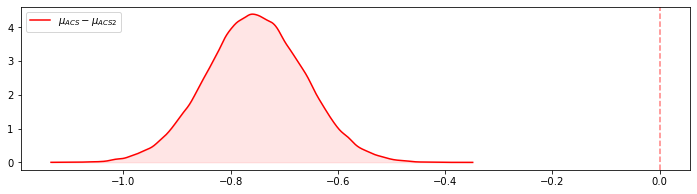

In [17]:
figsize(12, 3)

delta_mu = trace['mu1'] - trace['mu2']

x = np.linspace(min(delta_mu), max(delta_mu), 1000)
gkde = gaussian_kde(delta_mu)

plt.plot(x, gkde(x), color='red', label='$\mu_{ACS}-\mu_{ACS2}$')
plt.fill_between(x, gkde(x), alpha=0.1, color='red')
plt.axvline(0, color='red', alpha=0.5, linestyle='--')
plt.legend();